In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.shape

(26707, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [7]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<AxesSubplot:xlabel='unique_id', ylabel='count'>

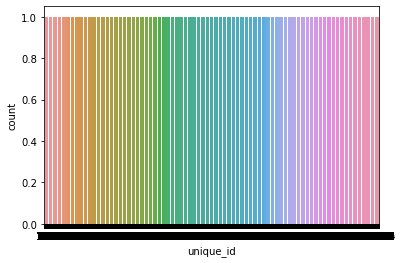

In [3]:
sns.countplot(x="unique_id",data=df)

In [6]:
pd.crosstab(df["unique_id"],df["sex"])

sex,Female,Male
unique_id,,
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
26702,1,0
26703,0,1
26704,1,0


<AxesSubplot:xlabel='unique_id', ylabel='count'>

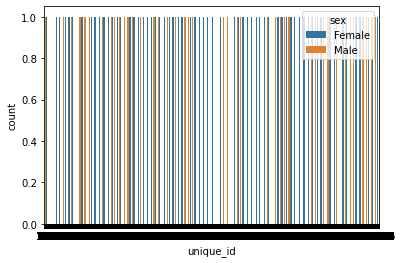

In [7]:
sns.countplot(x="unique_id",hue="sex",data=df)

In [10]:
pd.crosstab(df['unique_id'],df['antiviral_medication'])

antiviral_medication,0.0,1.0
unique_id,,
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
26702,1,0
26703,1,0
26704,1,0


<AxesSubplot:xlabel='unique_id', ylabel='count'>

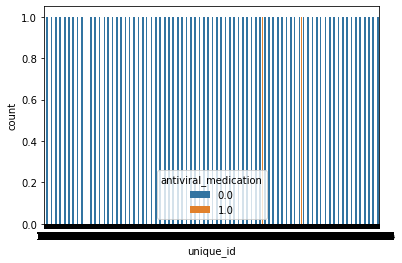

In [6]:
sns.countplot(x="unique_id",hue="antiviral_medication",data=df)

<AxesSubplot:xlabel='antiviral_medication', ylabel='no_of_adults'>

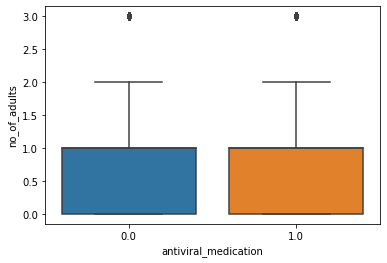

In [10]:
sns.boxplot(x="antiviral_medication",y="no_of_adults",data=df)

In [5]:
correlation_mat = df.corr()

<AxesSubplot:>

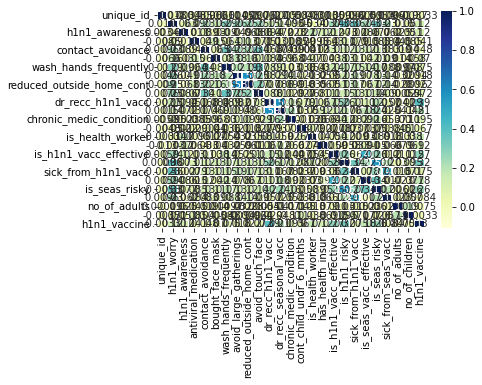

In [8]:
sns.heatmap(correlation_mat,annot=True,linewidth=2,cmap="YlGnBu")

<function matplotlib.pyplot.show(close=None, block=None)>

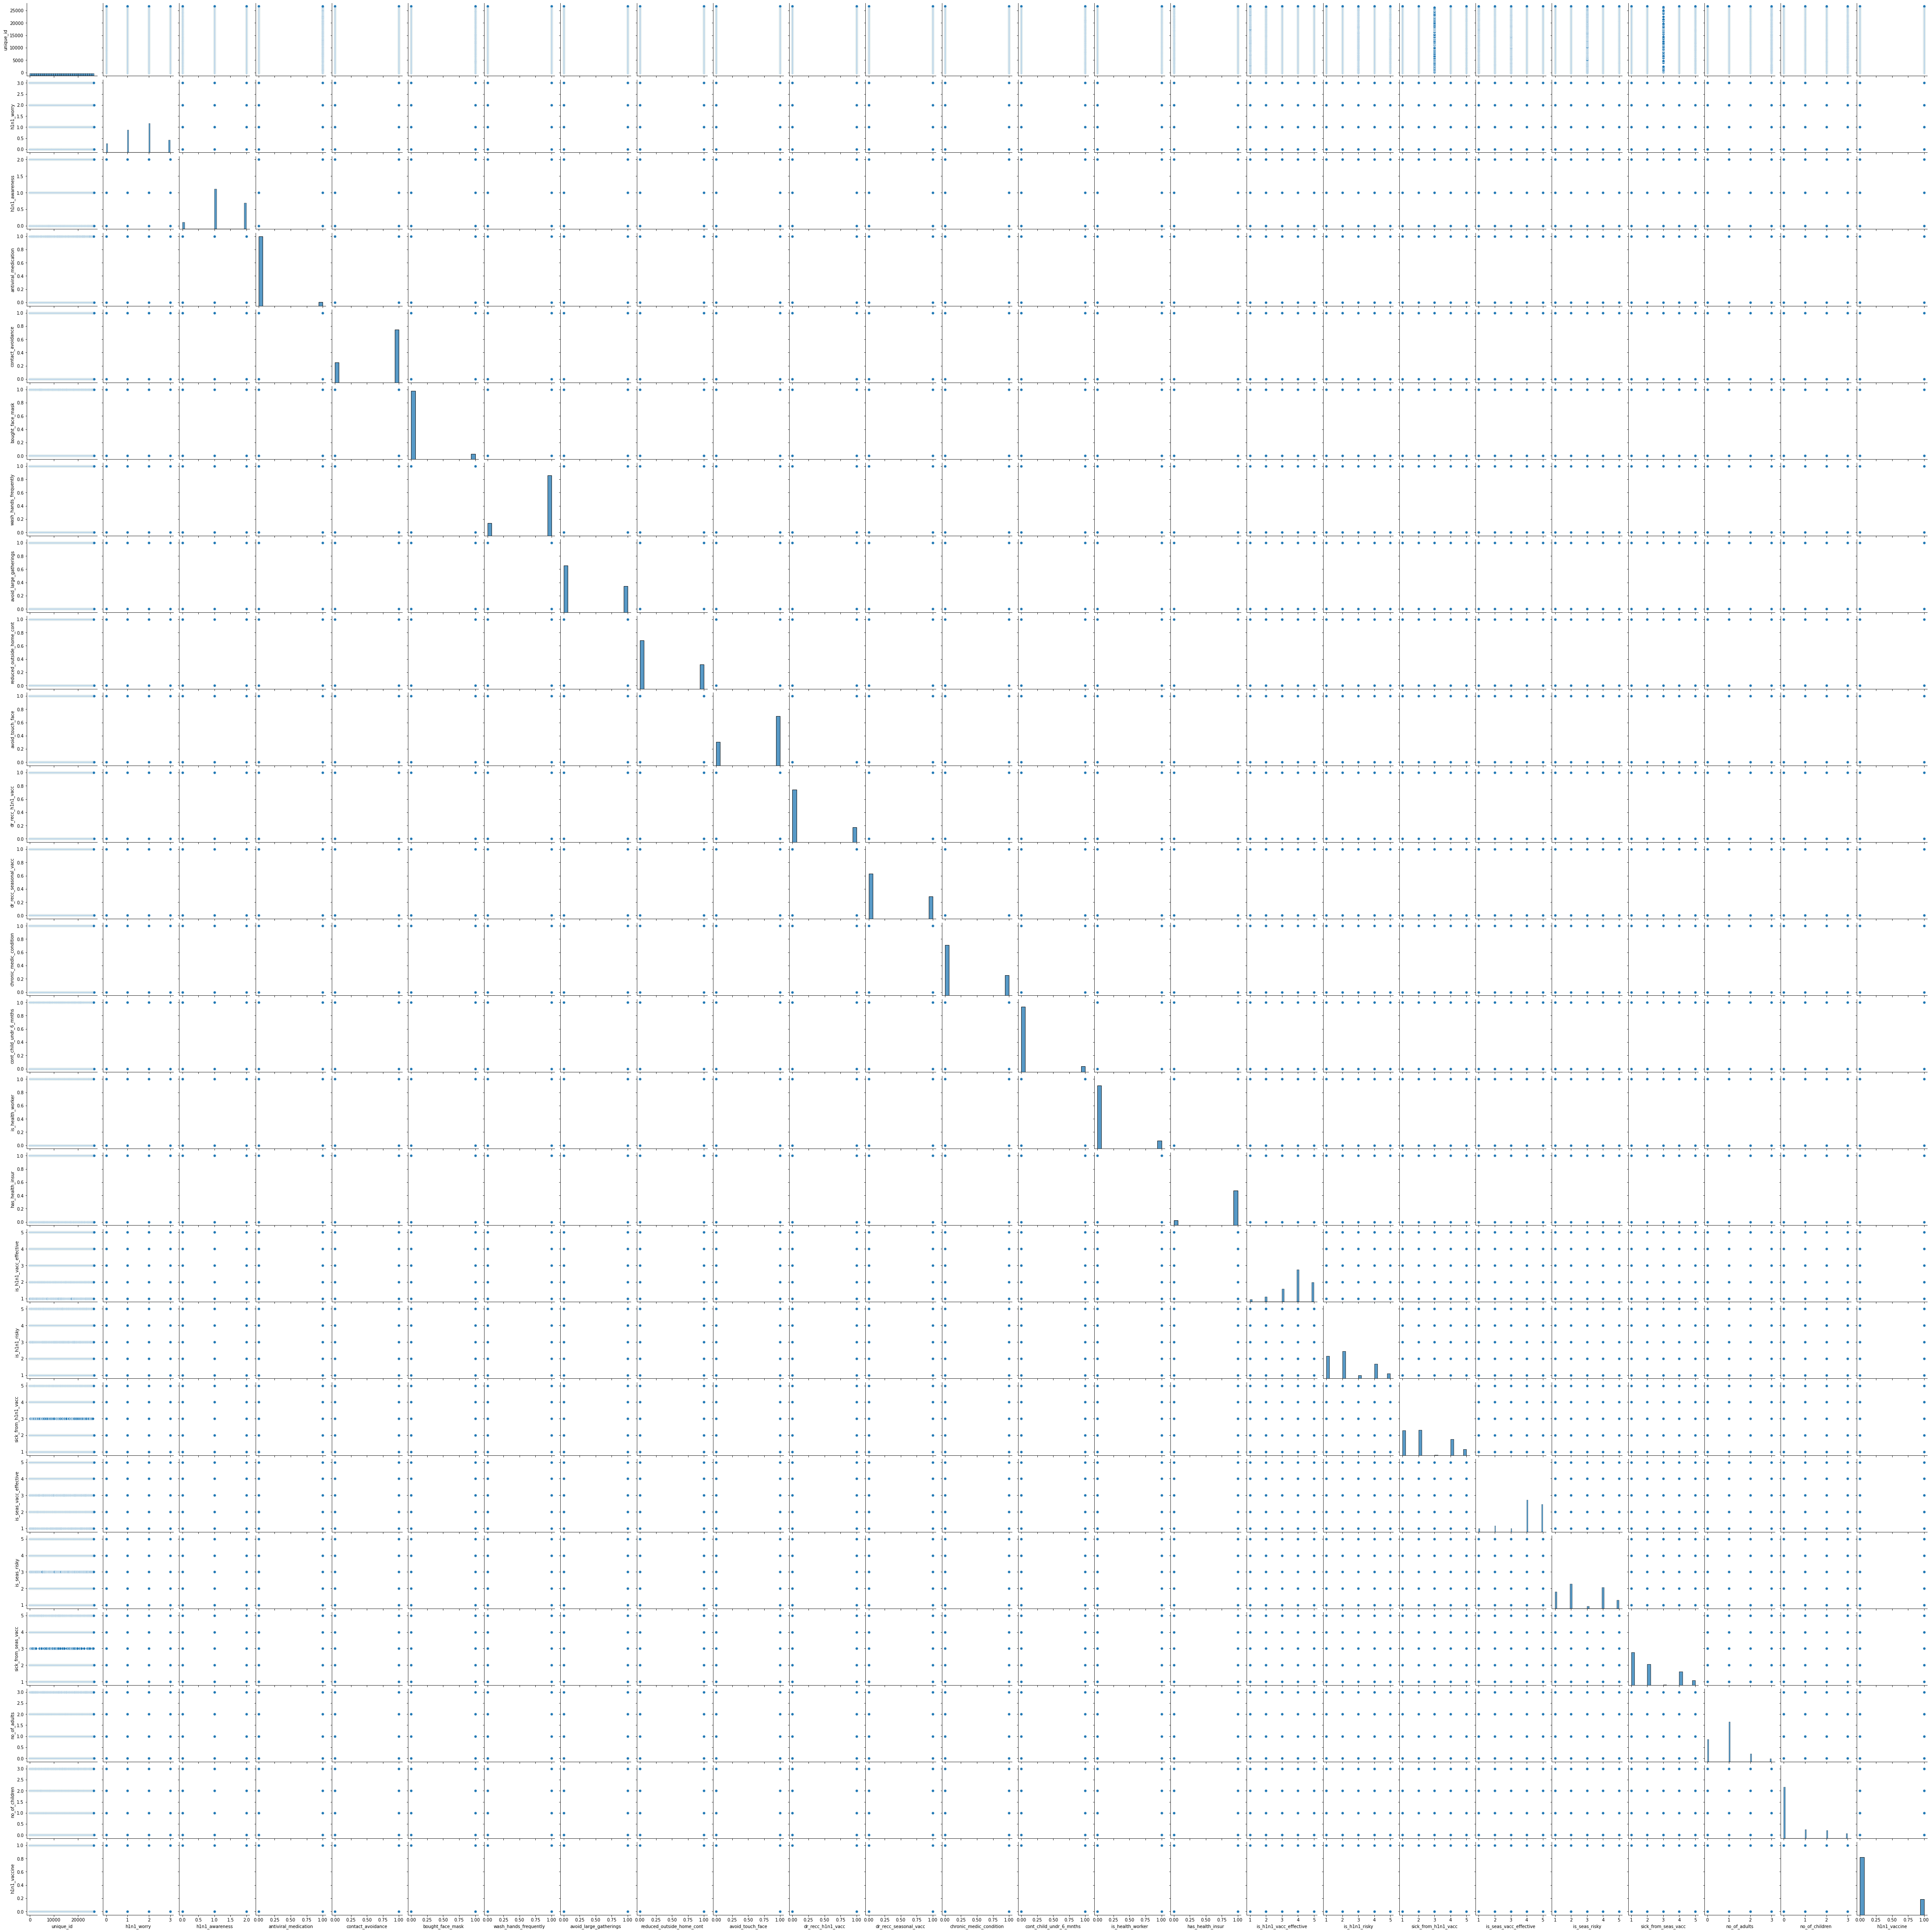

In [10]:
sns.pairplot(df)
plt.show

In [11]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

<AxesSubplot:>

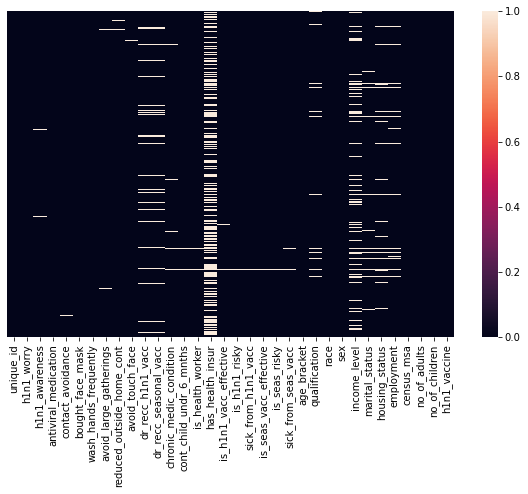

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [34]:
print(df["unique_id"].value_counts())
print(df["income_level"].value_counts())
print(df["qualification"].value_counts())
print(df["no_of_adults"].value_counts())
print(df["sex"].value_counts())
print(df["no_of_children"].value_counts())

0        1
17736    1
17812    1
17811    1
17810    1
        ..
8898     1
8897     1
8896     1
8895     1
26706    1
Name: unique_id, Length: 26707, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64
Female    15858
Male      10849
Name: sex, dtype: int64
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

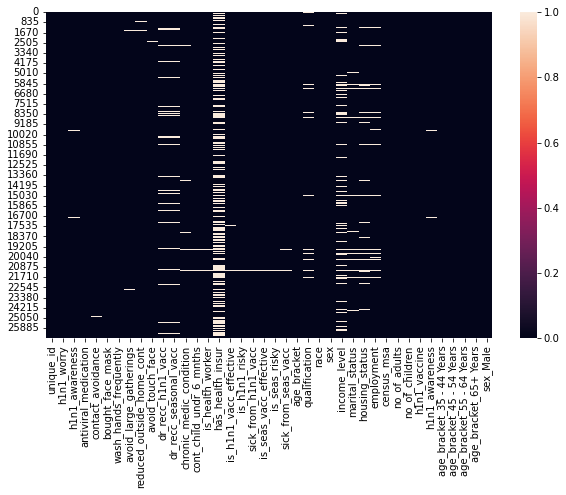

In [39]:
df["unique_id"].fillna(df["unique_id"].mode()[0],inplace=True)
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["sex"].fillna(df["sex"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)

df["no_of_adults"]=df["no_of_adults"].replace('3',int(3))
df["no_of_adults"]=df["no_of_adults"].replace('2',int(2))
df["no_of_adults"]=df["no_of_adults"].replace('1',int(1))
df["no_of_adults"]=df["no_of_adults"].replace('0',int(0))

df["h1n1_worry"].fillna(df["h1n1_worry"].median(),inplace=True)

print(df.isnull().sum())

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [40]:
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,census_msa,no_of_adults,no_of_children,h1n1_vaccine,h1n1_awareness,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Non-MSA,0.0,0.0,0,0.0,0,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"MSA, Not Principle City",0.0,0.0,0,2.0,1,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"MSA, Not Principle City",2.0,0.0,0,1.0,0,0,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,"MSA, Principle City",0.0,0.0,0,1.0,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"MSA, Not Principle City",1.0,0.0,0,1.0,0,1,0,0,0


In [24]:
dummies=pd.get_dummies(df[["h1n1_awareness","age_bracket","sex"]],drop_first=True)

In [25]:
df=pd.concat([df,dummies],axis=1)

In [37]:
df.head()

,h1n1_worry,h1n1_awareness,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,...,age_bracket_65+ Years,sex_Male,h1n1_awareness,h1n1_awareness,h1n1_awareness,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,...,0,0,0.0,0.0,0.0,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,...,0,1,2.0,2.0,2.0,1,0,0,0,1
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0,1,1.0,1.0,1.0,0,0,0,0,1
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1,0,1.0,1.0,1.0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,...,0,0,1.0,1.0,1.0,0,1,0,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 40 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [3]:
X=df.drop(["h1n1_vaccine","unique_id"],axis=1)
y=df["h1n1_vaccine"]

In [4]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [5]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [7]:
model=LogisticRegression(solver="liblinear")

In [9]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [10]:
model.score(X_train,y_train)

0.8481865839306729

In [11]:
model.score(X_test,y_test)

0.8418819418445027

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
dtree.score(X_train,y_train)

0.9967369209371991

In [15]:
dtree.score(X_test,y_test)

0.7670036191189318

In [16]:
dTreeR=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.8250240718947256


In [19]:
y_predict=dTreeR.predict(X_test)

In [30]:
print(dTreeR.score(X_test,y_test))

0.8204168226631724


In [11]:
from sklearn import metrics

<AxesSubplot:>

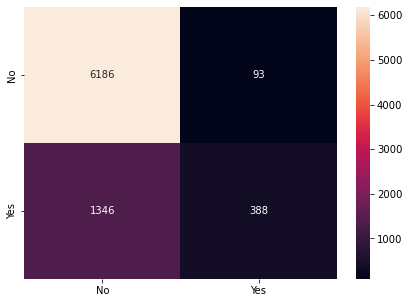

In [21]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["No","Yes"]],
                  columns=[i for i in["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [29]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl=bgcl.fit(X_train,y_train)
y_predict=bgcl.predict(X_test)
print(bgcl.score(X_test,y_test))

0.8325221515038063


<AxesSubplot:>

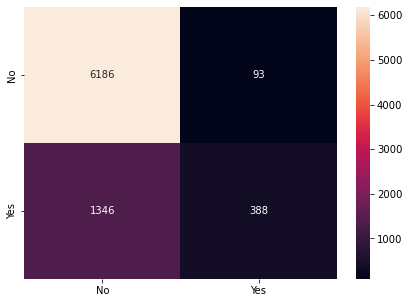

In [22]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["No","Yes"]],
                  columns=[i for i in["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=120,random_state=0)
abcl=abcl.fit(X_train,y_train)
y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.845376263571696


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=AdaBoostClassifier(n_estimators=120,random_state=0)
gbcl=abcl.fit(X_train,y_train)
y_predict=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

0.845376263571696


<AxesSubplot:>

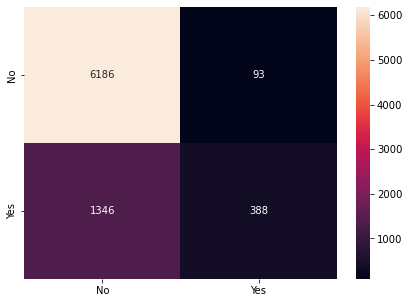

In [23]:
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["No","Yes"]],
                  columns=[i for i in["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=160,random_state=0,max_features=3)
rfcl=rfcl.fit(X_train,y_train)

0.8408835642081617


<AxesSubplot:>

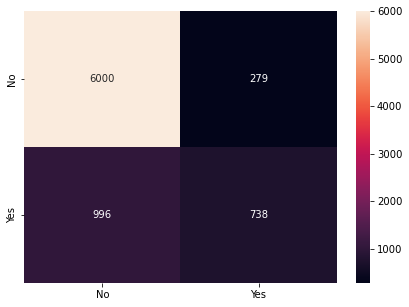

In [27]:
y_predict=rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["No","Yes"]],
                  columns=[i for i in["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')